In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import sys
# sys.path.append('..')
import os
os.chdir('..')

In [3]:
from src.data.datasets import ClassImagesSet, MetaDataset

In [4]:
from src.data.dataset_managers import MetaDataLoader

In [5]:
train_classes = ClassImagesSet('/home/oscarli/projects/meta-analysis-classification/data/tieredImagenet-base/base.json',
                               preload=False)

loading image paths, labels from json  /home/oscarli/projects/meta-analysis-classification/data/tieredImagenet-base/base.json


In [6]:
for cl in train_classes.items():
    print(cl)

(0, <src.data.datasets.ClassImages object at 0x7f6b1c9f2190>)
(1, <src.data.datasets.ClassImages object at 0x7f6b1cac7dd0>)
(2, <src.data.datasets.ClassImages object at 0x7f6b1c9f8d50>)
(3, <src.data.datasets.ClassImages object at 0x7f6b1c9f8d10>)
(4, <src.data.datasets.ClassImages object at 0x7f6b1c9f8cd0>)
(5, <src.data.datasets.ClassImages object at 0x7f6b1c9f8e90>)
(6, <src.data.datasets.ClassImages object at 0x7f6b1c9f8f90>)
(7, <src.data.datasets.ClassImages object at 0x7f6b1c9f8d90>)
(8, <src.data.datasets.ClassImages object at 0x7f6b1c9f8f50>)
(9, <src.data.datasets.ClassImages object at 0x7f6b1c9f8e50>)
(10, <src.data.datasets.ClassImages object at 0x7f6b1c9f8fd0>)
(11, <src.data.datasets.ClassImages object at 0x7f6b1c9f8c90>)
(12, <src.data.datasets.ClassImages object at 0x7f6b1c9f8dd0>)
(13, <src.data.datasets.ClassImages object at 0x7f6b1a0c8050>)
(14, <src.data.datasets.ClassImages object at 0x7f6b1a0c8090>)
(15, <src.data.datasets.ClassImages object at 0x7f6b1a0c80d0>)
(1

In [7]:
train_meta_dataset = MetaDataset(
                        dataset_name='tiered-imagenet_new',
                        support_class_images_set=train_classes,
                        query_class_images_set=train_classes,
                        image_size=84,
                        support_aug=True, query_aug=True,
                        fix_support=0, save_folder='.', 
                        fix_support_path='')

No. of classes in set support 351                 query 351
Support set is fixed: False
support aug: True query aug: True
Setting support loader for class 0 using 1040 images from class
Setting support loader for class 1 using 1040 images from class
Setting support loader for class 2 using 1040 images from class
Setting support loader for class 3 using 1040 images from class
Setting support loader for class 4 using 1040 images from class
Setting support loader for class 5 using 1040 images from class
Setting support loader for class 6 using 1040 images from class
Setting support loader for class 7 using 1040 images from class
Setting support loader for class 8 using 1040 images from class
Setting support loader for class 9 using 1040 images from class
Setting support loader for class 10 using 1040 images from class
Setting support loader for class 11 using 1040 images from class
Setting support loader for class 12 using 1040 images from class
Setting support loader for class 13 using 1

In [8]:
train_meta_dataset.support_sub_dataloader[0].cl

0

In [9]:
task_class_info = {
    'task_idx': 2,
    'cl': 0,
    'n_shot': 5,
    'n_query': 16,
    'cl_label': 3,
}
train_meta_dataset[task_class_info].keys()

dict_keys(['task_idx', 'cl', 'support_x_cl', 'support_y_cl', 'query_x_cl', 'query_y_cl'])

In [10]:
print(train_meta_dataset[task_class_info]['task_idx'])
print(train_meta_dataset[task_class_info]['cl'])
print(train_meta_dataset[task_class_info]['support_x_cl'].shape)
print(train_meta_dataset[task_class_info]['support_y_cl'].shape)
print(train_meta_dataset[task_class_info]['query_x_cl'].shape)
print(train_meta_dataset[task_class_info]['query_y_cl'].shape)
print(train_meta_dataset[task_class_info]['support_y_cl'])
print(train_meta_dataset[task_class_info]['query_y_cl'])

2
0
torch.Size([5, 3, 84, 84])
torch.Size([5])
torch.Size([16, 3, 84, 84])
torch.Size([16])
tensor([3, 3, 3, 3, 3])
tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])


In [14]:
from test_functionality.test_utils import chw2hwc, naive_normalize

In [15]:
import numpy as np
import matplotlib.pyplot as plt

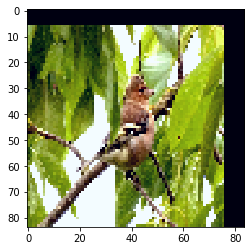

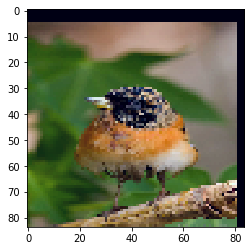

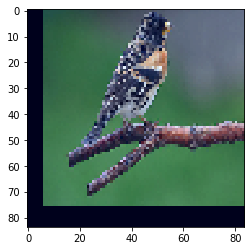

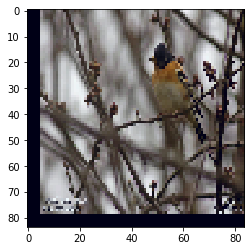

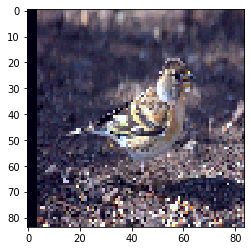

In [16]:
support = train_meta_dataset[task_class_info]['support_x_cl']
for i in range(5):
    plt.imshow(naive_normalize(chw2hwc(support[i].numpy())))
    plt.show()

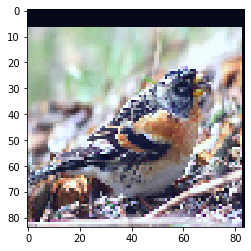

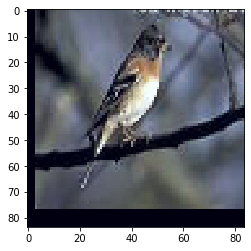

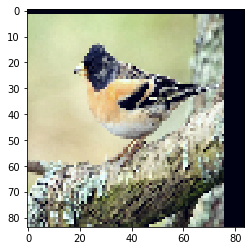

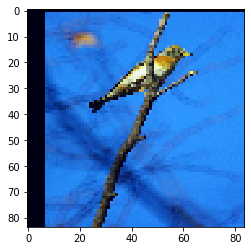

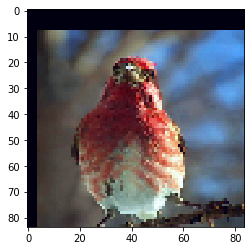

In [19]:
support = train_meta_dataset[task_class_info]['query_x_cl']
for i in range(5):
    plt.imshow(naive_normalize(chw2hwc(support[i].numpy())))
    plt.show()

In [16]:
train_loader = MetaDataLoader(
                    dataset=train_meta_dataset,
                    n_batches=200,
                    batch_size=4,
                    n_way=5,
                    n_shot=5,
                    n_query=15,
                    randomize_query=True)

Size of Support: 5
Size of Query: 15 randomize query True
Setting an episodic sampler over classes
(0, 0.002849002849002849)
(1, 0.002849002849002849)
(2, 0.002849002849002849)
(3, 0.002849002849002849)
(4, 0.002849002849002849)
(5, 0.002849002849002849)
(6, 0.002849002849002849)
(7, 0.002849002849002849)
(8, 0.002849002849002849)
(9, 0.002849002849002849)
(10, 0.002849002849002849)
(11, 0.002849002849002849)
(12, 0.002849002849002849)
(13, 0.002849002849002849)
(14, 0.002849002849002849)
(15, 0.002849002849002849)
(16, 0.002849002849002849)
(17, 0.002849002849002849)
(18, 0.002849002849002849)
(19, 0.002849002849002849)
(20, 0.002849002849002849)
(21, 0.002849002849002849)
(22, 0.002849002849002849)
(23, 0.002849002849002849)
(24, 0.002849002849002849)
(25, 0.002849002849002849)
(26, 0.002849002849002849)
(27, 0.002849002849002849)
(28, 0.002849002849002849)
(29, 0.002849002849002849)
(30, 0.002849002849002849)
(31, 0.002849002849002849)
(32, 0.002849002849002849)
(33, 0.0028490028490

In [17]:
for data in train_loader:
    break

In [18]:
type(data)
len(data)

4

In [19]:
data[0].shape

torch.Size([4, 25, 3, 84, 84])

In [20]:
data[1] # support labels

tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2,
         2],
        [4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0,
         0],
        [3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 4, 4, 4, 4,
         4],
        [3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 4, 4, 4, 4,
         4]])

In [21]:
import time
from tqdm import tqdm

In [22]:
time_points = [time.time()]
for i, data in enumerate(train_loader):
    time_points.append(time.time())

In [23]:
import matplotlib.pyplot as plt

In [24]:
import numpy as np

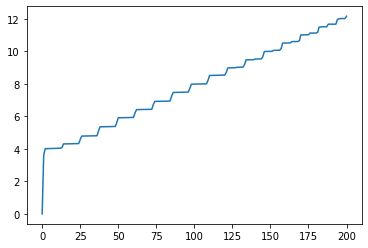

In [25]:
plt.plot(list(range(len(time_points))), np.array(time_points) - time_points[0])

In [26]:
(time_points[200] - time_points[25]) / (200 - 25)

0.04337101800101144

In [27]:
data[1].shape

torch.Size([4, 25])